<a href="https://colab.research.google.com/github/Prisze/AAI-501/blob/priscilla-dev/gettingstarted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Getting Started


In [3]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [6]:
!mkdir ~/.kaggle

In [7]:
! cp kaggle.json ~/.kaggle/

In [8]:
! chmod 600 ~/.kaggle/kaggle.json

In [9]:
! kaggle datasets list

ref                                                                 title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                         📚 Students Performance Dataset 📚                     66KB  2024-06-12 23:09:20          10096        212  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024                   Most Streamed Spotify Songs 2024                    496KB  2024-06-15 18:50:51           7872        165  1.0              
humairmunir/anaemia-prediction                                      Anaemia Prediction                                    2KB  2024-07-04 17:58:40            607         26  1.0              
ihelon/coffee-sales                     

In [10]:
! kaggle datasets download -d nipunarora8/age-gender-and-ethnicity-face-data-csv

Dataset URL: https://www.kaggle.com/datasets/nipunarora8/age-gender-and-ethnicity-face-data-csv
License(s): copyright-authors
100% 63.0M/63.2M [00:05<00:00, 14.4MB/s]
100% 63.2M/63.2M [00:05<00:00, 12.0MB/s]


In [11]:
! unzip age-gender-and-ethnicity-face-data-csv.zip

Archive:  age-gender-and-ethnicity-face-data-csv.zip
  inflating: age_gender.csv          


In [12]:
! unzip age-gender-and-ethnicity-face-data-csv.zip


Archive:  age-gender-and-ethnicity-face-data-csv.zip
replace age_gender.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: age_gender.csv          


# New Section

In [1]:
#Importing Libs
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as L
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split

In [13]:
data = pd.read_csv('/content/age_gender.csv')
data

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...,...
23700,99,0,1,20170120221920654.jpg.chip.jpg,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,20170120134639935.jpg.chip.jpg,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,20170110182418864.jpg.chip.jpg,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,20170117195405372.jpg.chip.jpg,45 108 120 156 206 197 140 180 191 199 204 207...


In [14]:
## Converting pixels into numpy array
data['pixels']=data['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


In [15]:
img = data['pixels'].iloc[1480].reshape([48,48])

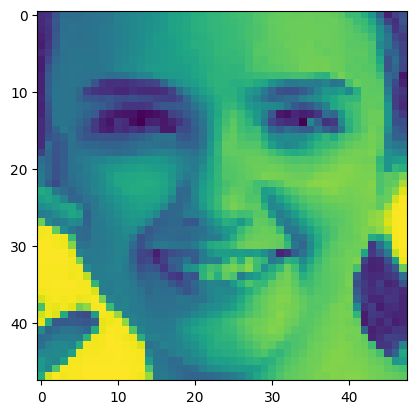

In [16]:
plt.imshow(img)

In [17]:
from torchvision.transforms.v2 import functional as f
import torch

def preprocess(image):
  image = image.reshape([1, 48, 48])
  image = torch.tensor(image)
  return image / 255

images = data[['gender', 'pixels']]
images['pixels'] = images['pixels'].apply(preprocess)

<ipython-input-17-321c878b9d54>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  images['pixels'] = images['pixels'].apply(preprocess)


In [18]:
from torch.utils.data import DataLoader

image_loader = DataLoader(list(images.itertuples(index=False)), batch_size=512, shuffle=True)

In [19]:
from torch import nn

model = nn.Sequential(
            nn.LazyConv2d(16, kernel_size=4, stride=2, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=4, stride=2),
            nn.LazyConv2d(8, kernel_size=2, stride=2, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=4, stride=2),
            nn.Flatten(),
            nn.Dropout(p=0.5),
            nn.LazyLinear(48),
            nn.ReLU(inplace=True),
            nn.LazyLinear(1),
        )

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [61]:
import torch.optim as optim

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)

model = model.cuda()

model.train()

for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(image_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        labels, inputs = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs.cuda())
        loss = criterion(outputs, labels.unsqueeze(1).float().cuda())
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 512:.3f}')
        running_loss = 0.0

[1,     1] loss: 0.001
[1,     2] loss: 0.001
[1,     3] loss: 0.001
[1,     4] loss: 0.001
[1,     5] loss: 0.001
[1,     6] loss: 0.001
[1,     7] loss: 0.001
[1,     8] loss: 0.001
[1,     9] loss: 0.001
[1,    10] loss: 0.001
[1,    11] loss: 0.001
[1,    12] loss: 0.001
[1,    13] loss: 0.001
[1,    14] loss: 0.001
[1,    15] loss: 0.001
[1,    16] loss: 0.001
[1,    17] loss: 0.001
[1,    18] loss: 0.001
[1,    19] loss: 0.001
[1,    20] loss: 0.001
[1,    21] loss: 0.001
[1,    22] loss: 0.001
[1,    23] loss: 0.001
[1,    24] loss: 0.001
[1,    25] loss: 0.001
[1,    26] loss: 0.001
[1,    27] loss: 0.001
[1,    28] loss: 0.001
[1,    29] loss: 0.001
[1,    30] loss: 0.001
[1,    31] loss: 0.001
[1,    32] loss: 0.001
[1,    33] loss: 0.001
[1,    34] loss: 0.001
[1,    35] loss: 0.001
[1,    36] loss: 0.001
[1,    37] loss: 0.001
[1,    38] loss: 0.001
[1,    39] loss: 0.001
[1,    40] loss: 0.001
[1,    41] loss: 0.001
[1,    42] loss: 0.001
[1,    43] loss: 0.001
[1,    44] 

In [62]:
model.eval()
with torch.no_grad():
  ctr = 0
  for category, image in image_loader:
    r = model(image.cuda())
    ctr += ((category.unsqueeze(1).cuda() > 0) == (r > 0)).sum()
  print(ctr / (len(image_loader) * 512))

tensor(0.7791, device='cuda:0')


In [52]:
len(image_loader)

47